In [1]:
import numpy as np
import pandas as pd
import pickle 
from os import path
import os
import matplotlib.pyplot as plt
import seaborn as sns


import warnings

warnings.filterwarnings('ignore')

In [3]:
for dirname,_,filenames in os.walk('dataset/'):
    for filename in filenames:
        print(os.path.join(dirname,filename))
        

dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv
dataset/Monday-WorkingHours.pcap_ISCX.csv
dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
dataset/Tuesday-WorkingHours.pcap_ISCX.csv
dataset/Wednesday-workingHours.pcap_ISCX.csv


In [4]:
df = pd.DataFrame()

keywords = [
    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Monday-WorkingHours.pcap_ISCX.csv",
    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "Tuesday-WorkingHours.pcap_ISCX.csv",
    "Wednesday-workingHours.pcap_ISCX.csv"
]

for dirname, _, filenames in os.walk('dataset/'):
    for filename in filenames:
        if any(keyword in filename for keyword in keywords):
            file_path = os.path.join(dirname, filename)
            df_temp = pd.read_csv(file_path)
            df = pd.concat([df, df_temp])
            del df_temp

nrow, ncol = df.shape
print(f'Rows: {nrow} Columns: {ncol}')


Rows: 2830743 Columns: 79


In [5]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [7]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.0,53.0,80.0,443.0,65535.0
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-13.0,155.0,31316.0,3204828.5,119999998.0
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.0,2.0,2.0,5.0,219759.0
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.0,1.0,2.0,4.0,291922.0
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.0,12.0,62.0,187.0,12900000.0
...,...,...,...,...,...,...,...,...
Active Min,2830743.0,5.829582e+04,5.770923e+05,0.0,0.0,0.0,0.0,110000000.0
Idle Mean,2830743.0,8.316037e+06,2.363008e+07,0.0,0.0,0.0,0.0,120000000.0
Idle Std,2830743.0,5.038439e+05,4.602984e+06,0.0,0.0,0.0,0.0,76900000.0
Idle Max,2830743.0,8.695752e+06,2.436689e+07,0.0,0.0,0.0,0.0,120000000.0


In [10]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [11]:
df[" Label"].value_counts()

 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
def plot_per_column_distribution(df,n_graph_shown,n_graph_per_row):
    nunique = df.nunique()
    columns_to_plot = df.columns[(nunique>1)&(nunique<50)]
    df_to_plot = df[columns_to_plot]
    
    nrows,ncols = df_to_plot.shape
    column_names = list(df_to_plot.columns)
    
    n_graph_row = (ncols + n_graph_per_row - 1)//n_graph_per_row
    plt.figure(num=None,figsize=(6*n_graph_per_row,8*n_graph_row),dpi=80,facecolor='w', edgecolor='k')
    
    for i,col_name in enumerate(columns_to_plot[:n_graph_shown]):
        plt.subplot(n_graph_row,n_graph_per_row,i+1)
        column_data = df_to_plot[col_name]
        
        if not np.issubdtype(type(column_data.iloc[0]),np.number):
            value_counts = column_data.value_counts()
            value_counts.plot.bar()
        else:
            column_data.hist()
        
        plt.ylabel('COUNTS')
        plt.xticks(rotation = 90)
        plt.title(f'{col_name} (column {i})')
        
    plt.tight_layout(pad= 1.0, w_pad= 1.0, h_pad=1.0)
    plt.show()
        

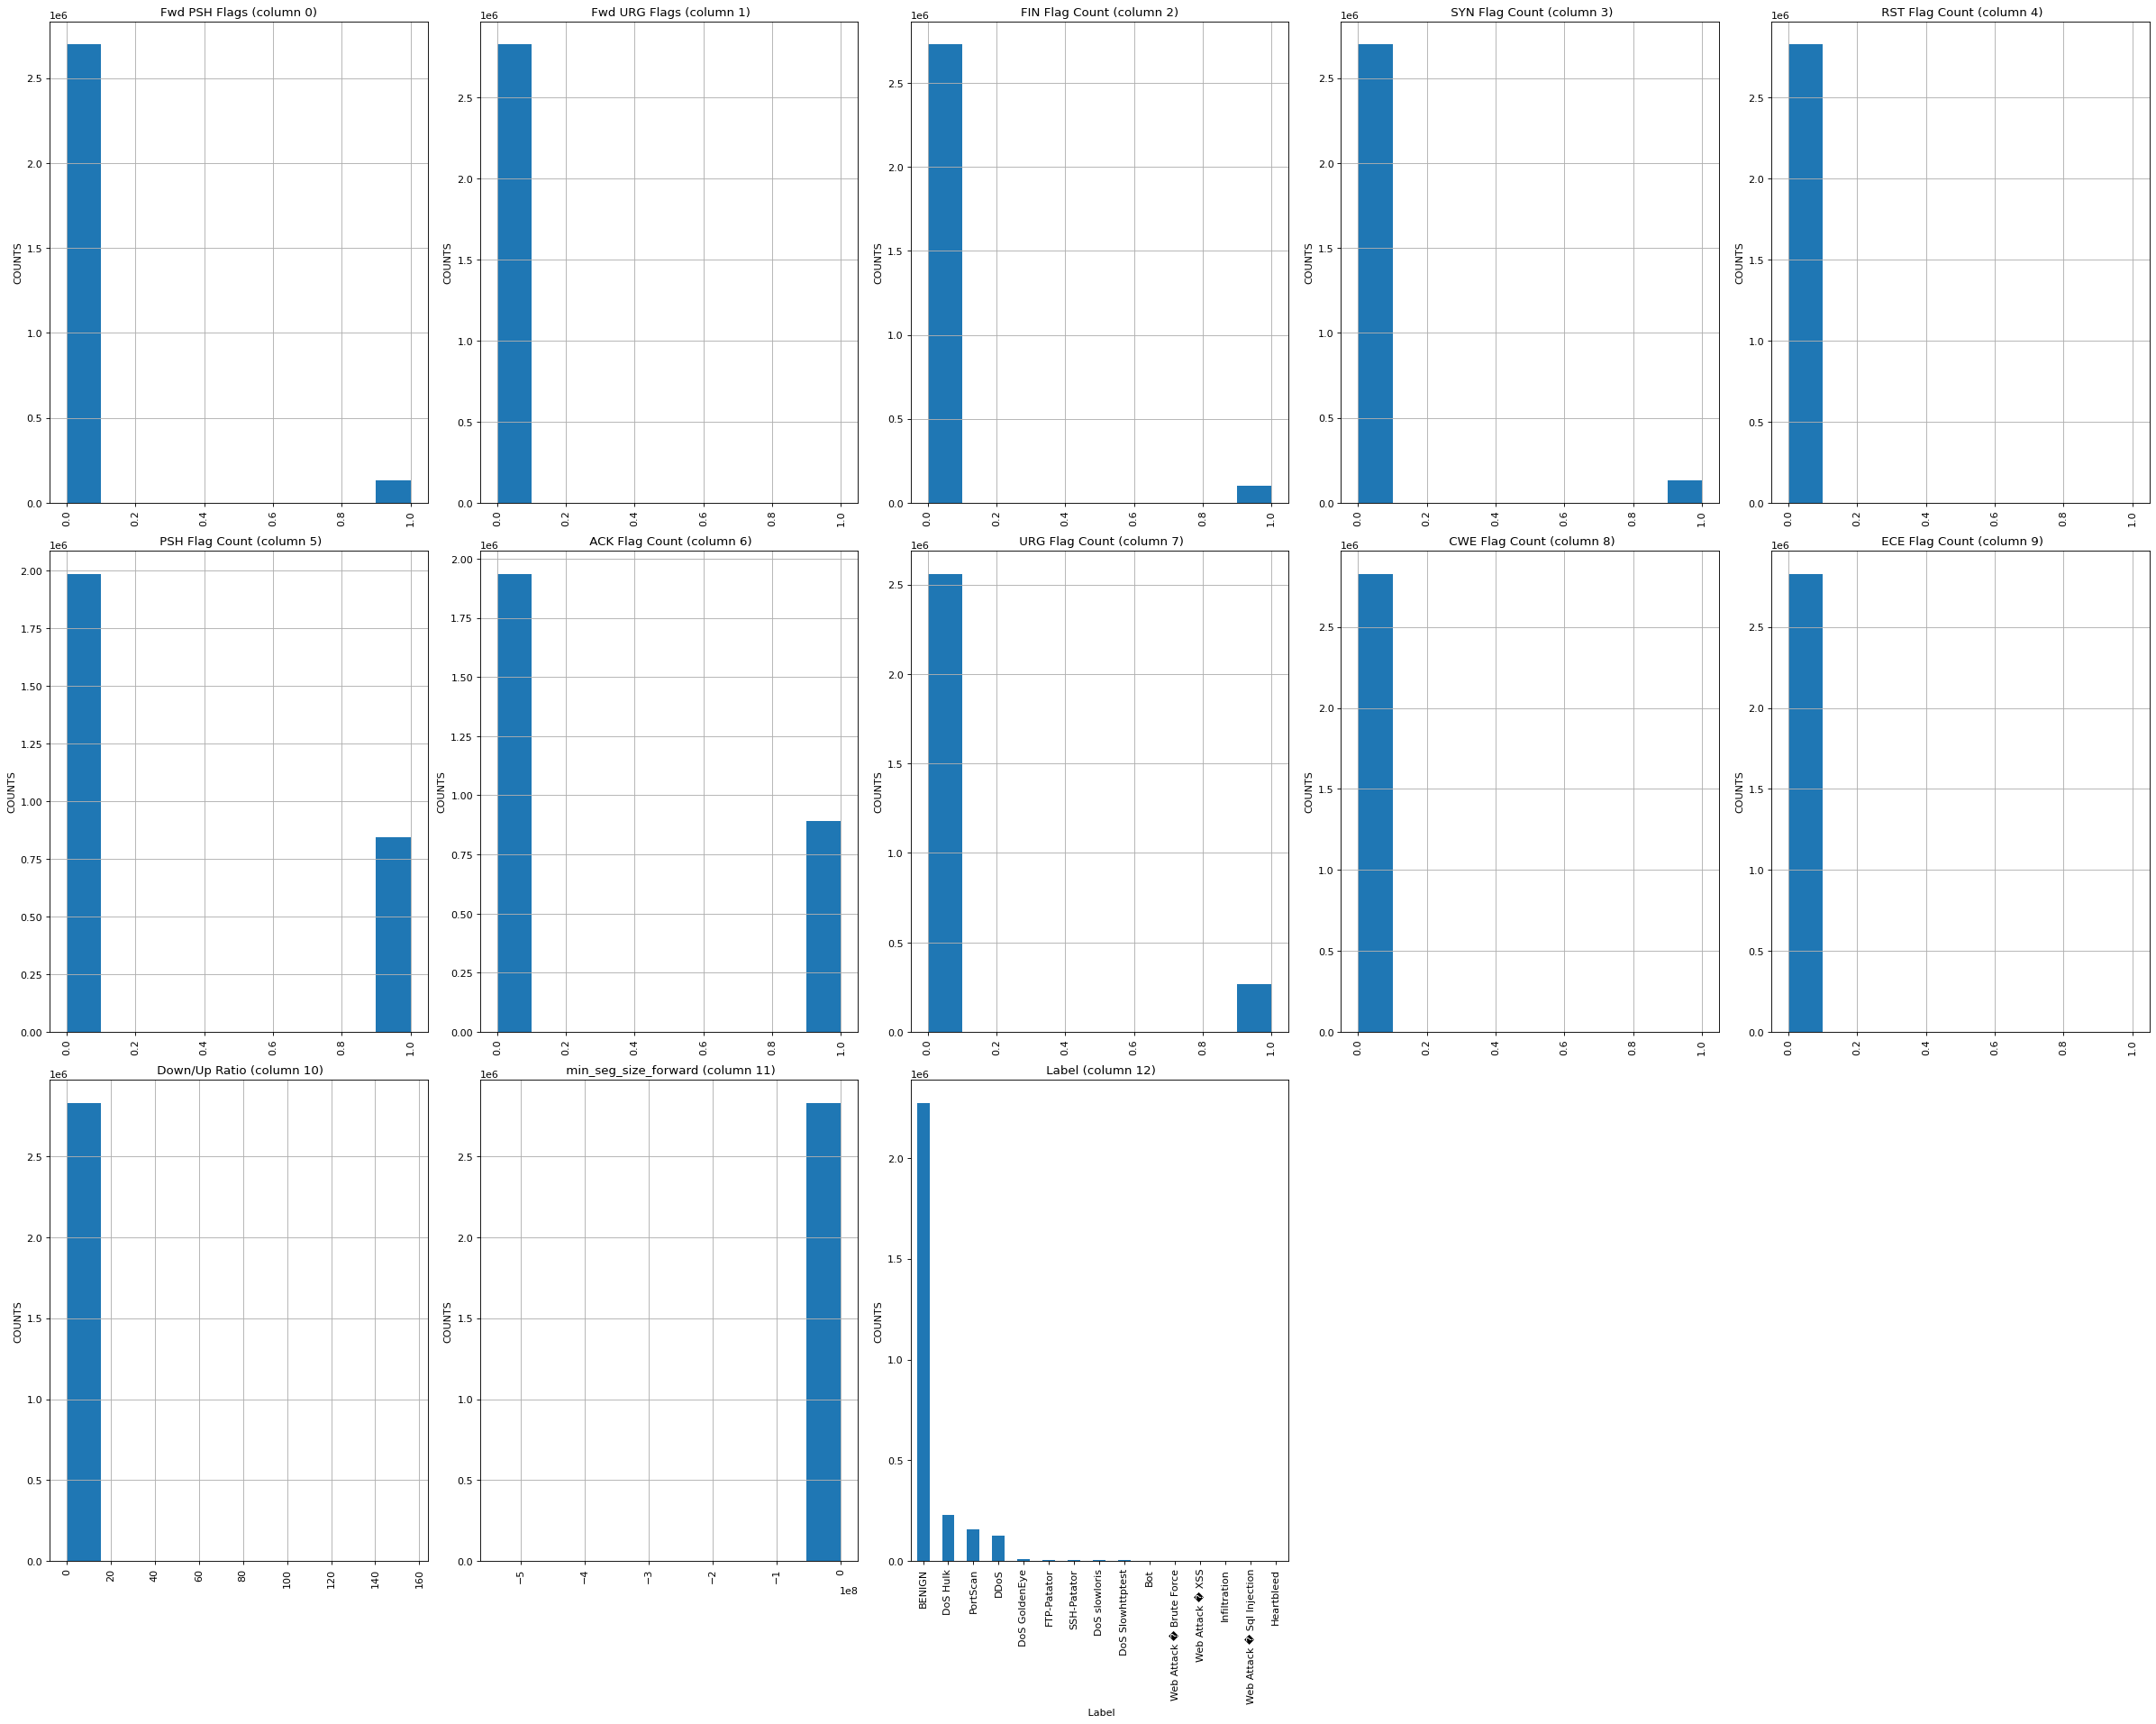

In [14]:
plt.rcParams['figure.figsize']=(30,30)
plot_per_column_distribution(df,80,5)

In [15]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind='bar')

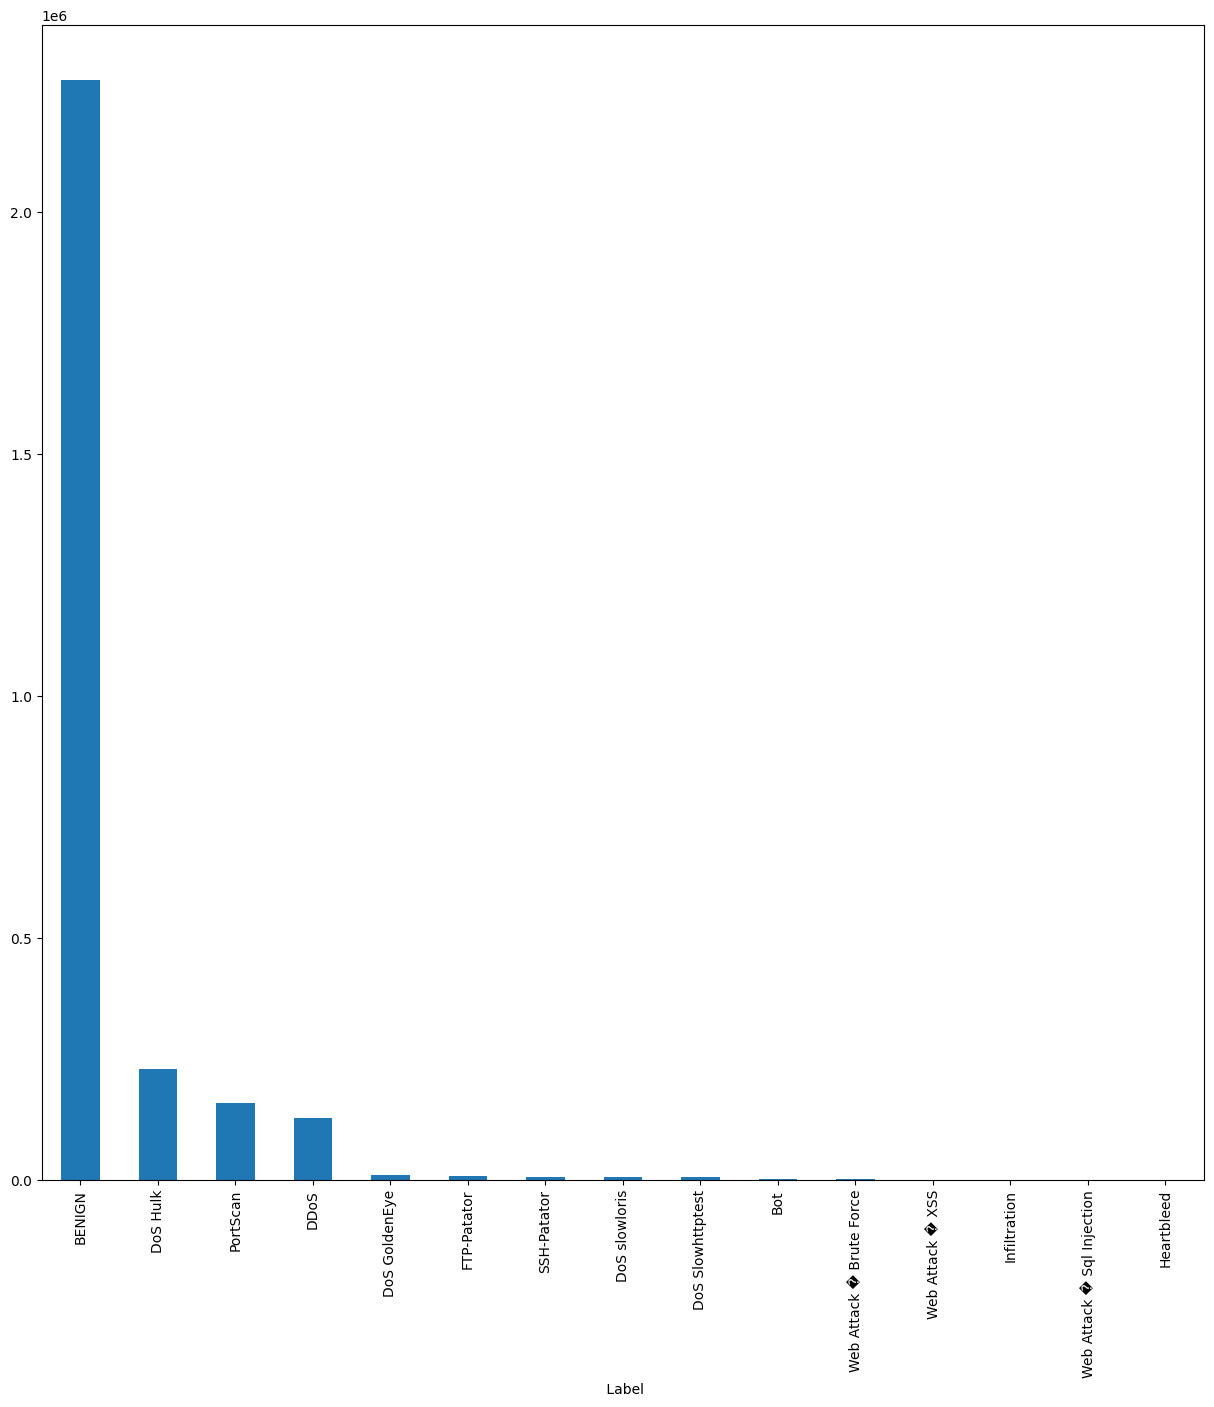

In [16]:
plt.rcParams['figure.figsize']= (15,15)
bar_graph(" Label")

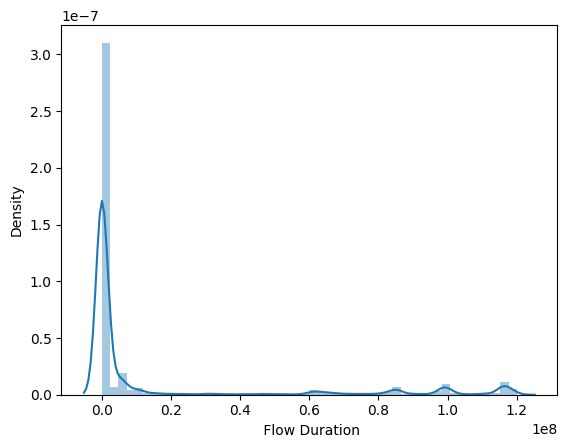

In [9]:
p = sns.distplot(a=df[' Flow Duration'])
plt.show() 

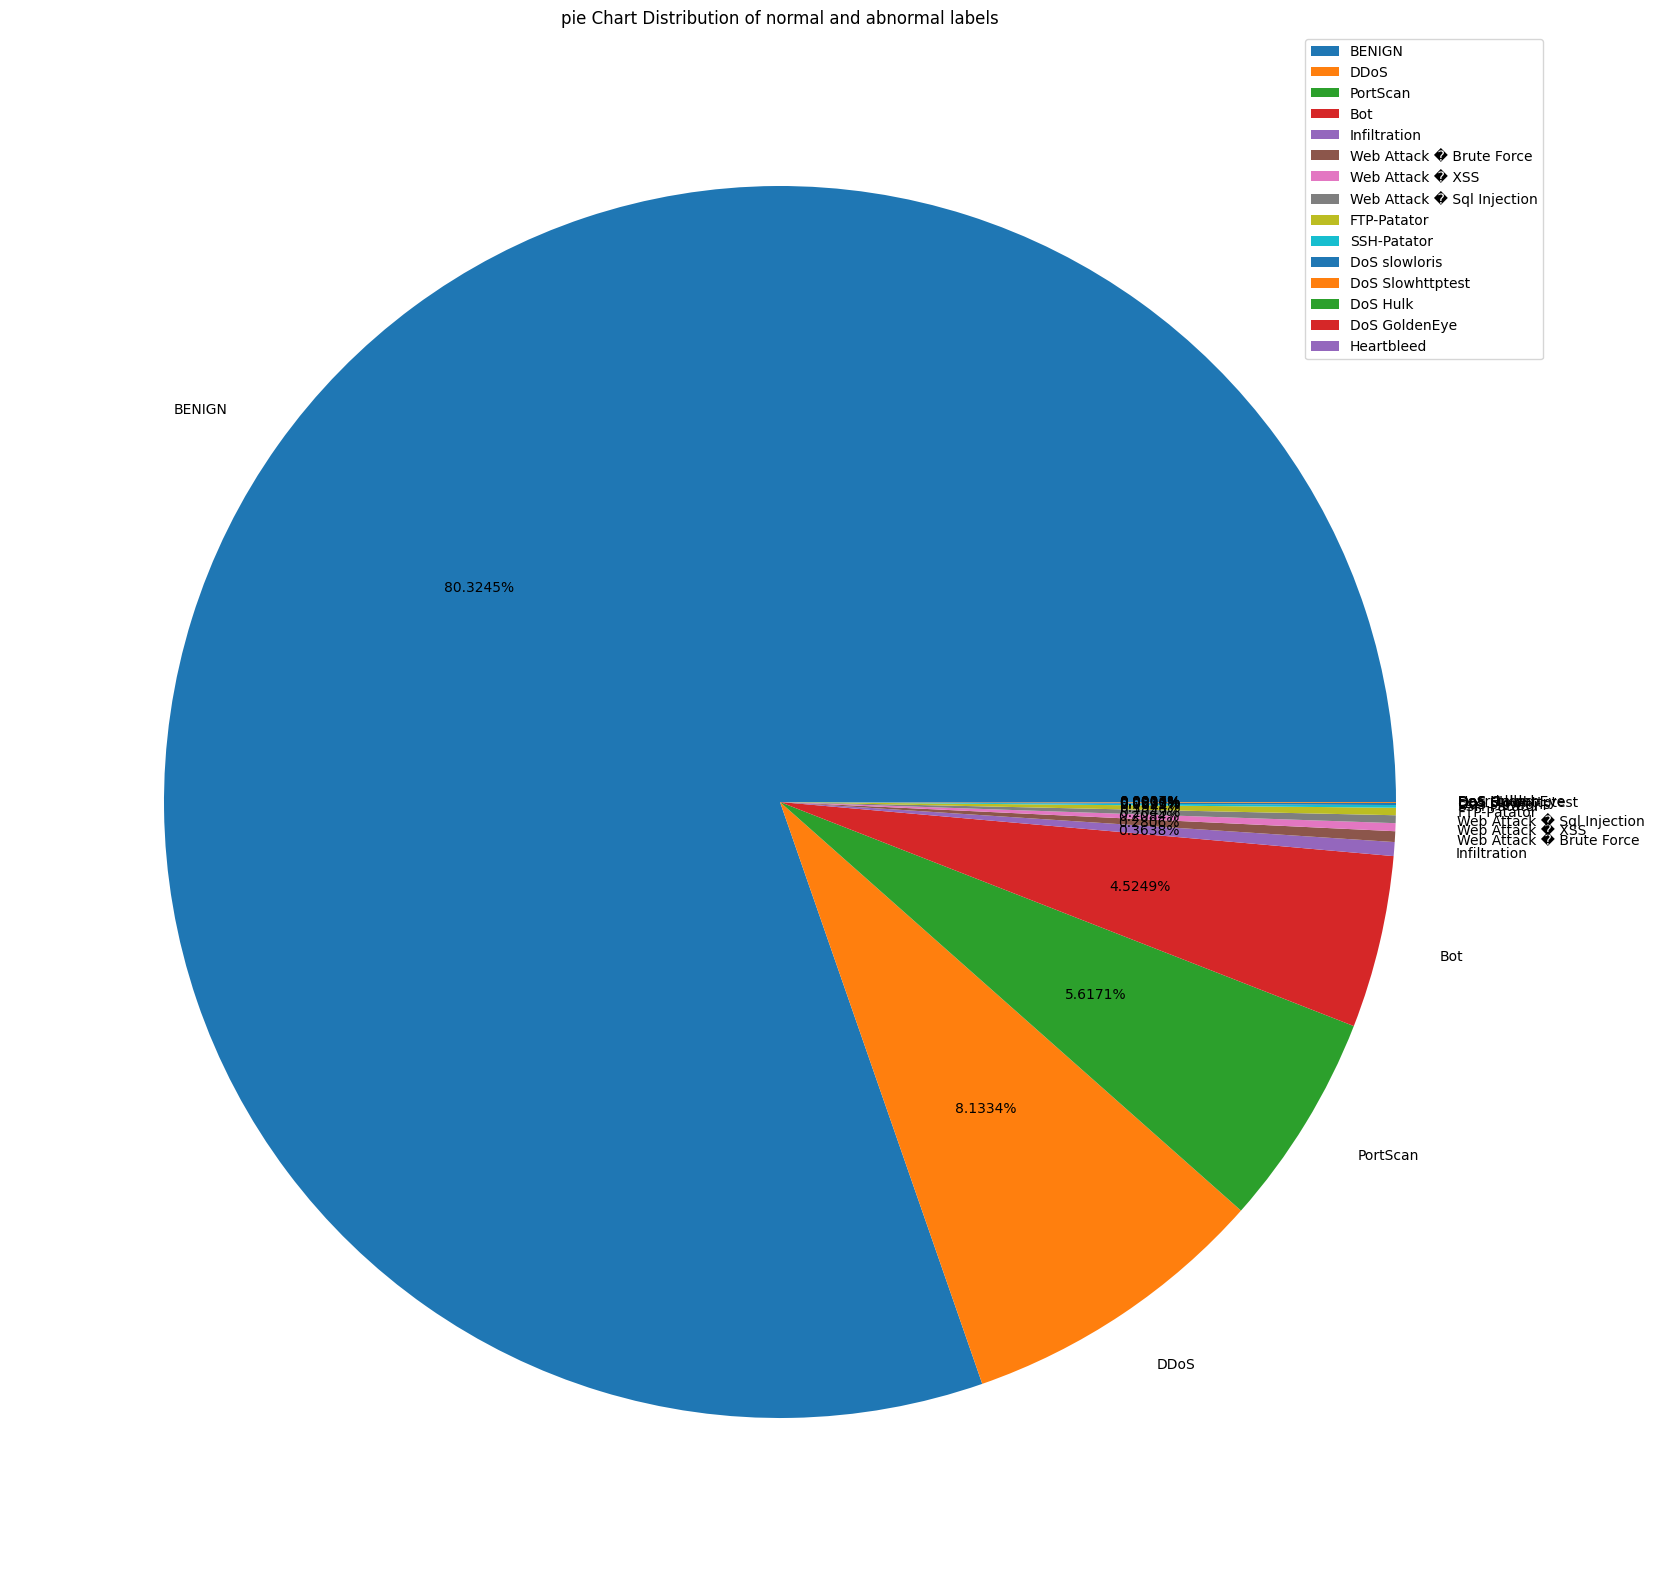

In [18]:
plt.figure(figsize=(40,20))
plt.pie(df[' Label'].value_counts(),labels=df[' Label'].unique(),autopct='%0.4f%%')
plt.title("pie Chart Distribution of normal and abnormal labels")
plt.legend()
plt.show()

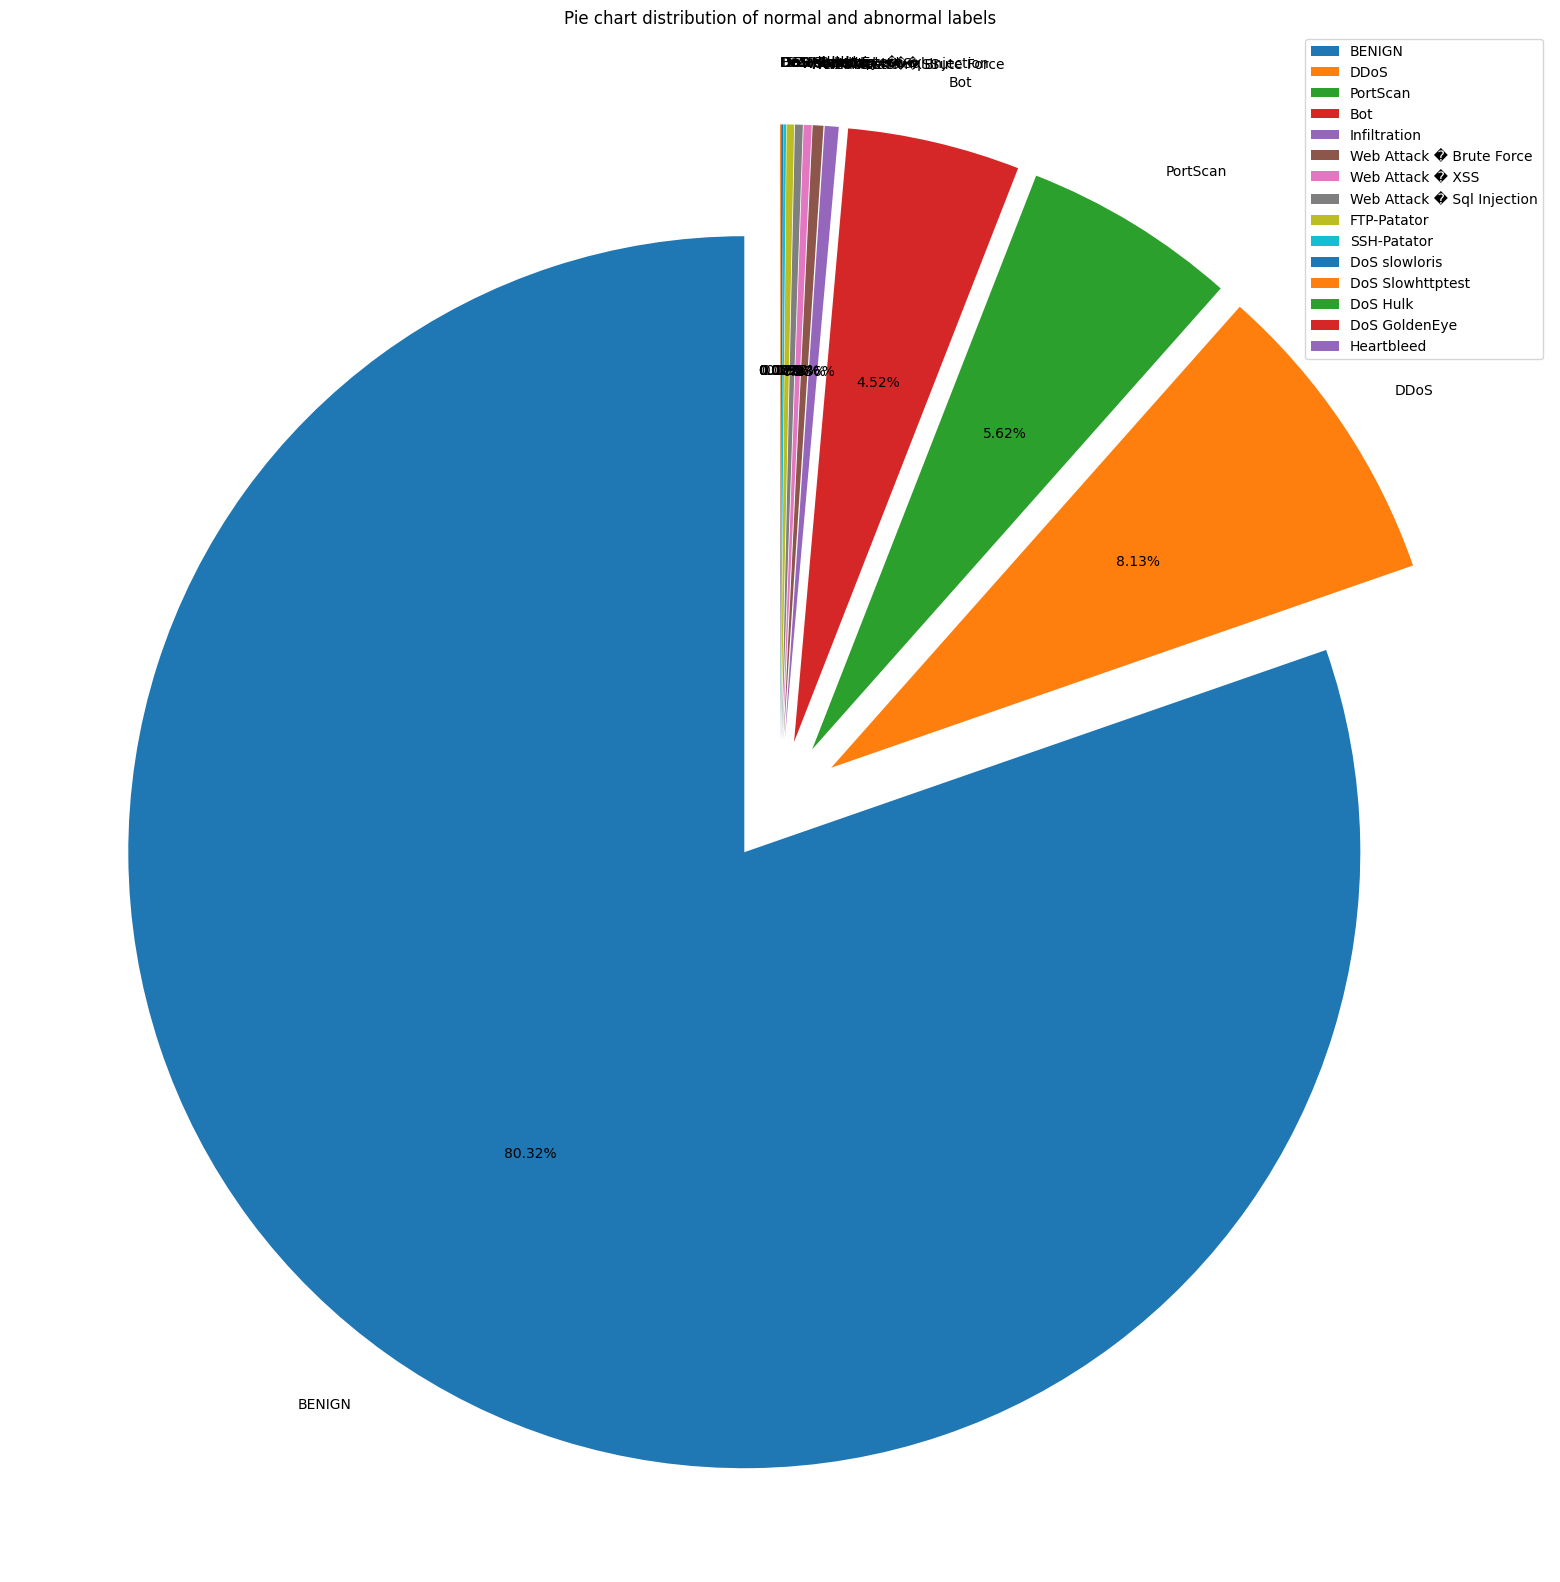

In [19]:
# Increase figure size
plt.figure(figsize=(20, 20))

# Pie chart distribution of normal and abnormal labels
labels = df[' Label'].unique()
sizes = df[' Label'].value_counts()
explode = (0.1,) * len(labels) # Explode all slices slightly

plt.pie(sizes, labels=labels, autopct='%0.2f%%', explode=explode, startangle=90)

# Title and legend
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend(labels, loc="best")

plt.show()

In [20]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df.shape

(2520798, 79)

In [21]:

classes_to_keep = ['DoS GoldenEye', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 
                   'Bot', 'Web Attack � Brute Force', 'Web Attack � XSS', 'Infiltration', 'Web Attack � Sql Injection', 'Heartbleed']


classes_to_limit = ['BENIGN', 'DoS Hulk', 'PortScan', 'DDoS']

df_keep = df[df[' Label'].isin(classes_to_keep)]

df_limit = df[df[' Label'].isin(classes_to_limit)].groupby(' Label').head(50000)

result_df = pd.concat([df_keep, df_limit])


result_df = result_df.sample(frac=1, random_state=42).reset_index(drop=True)

result_df.shape

(234187, 79)

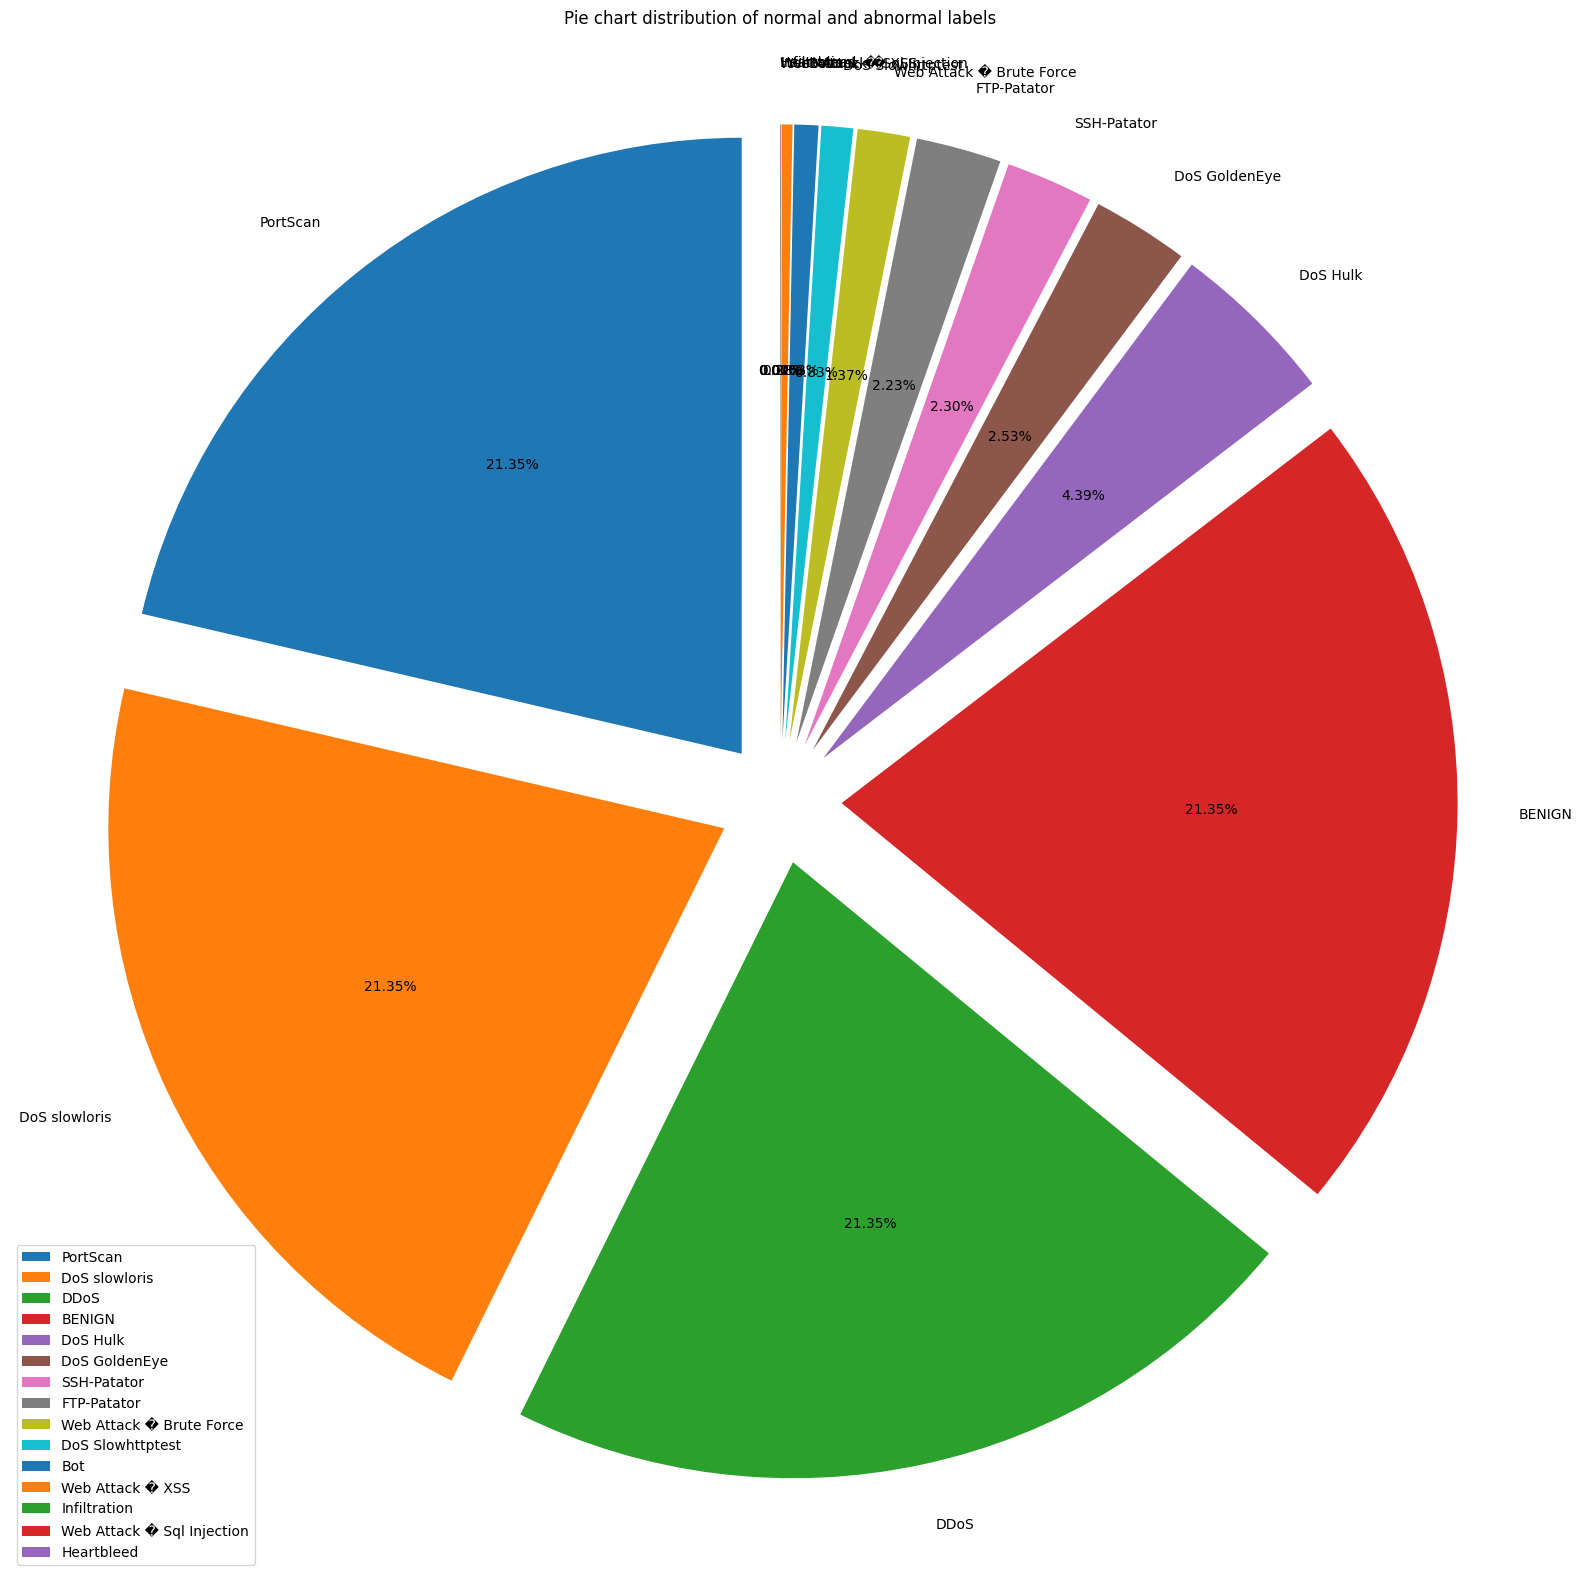

In [22]:
plt.figure(figsize=(20, 20))

labels = result_df[' Label'].unique()
sizes = result_df[' Label'].value_counts()
explode = (0.1,) * len(labels)

plt.pie(sizes, labels=labels, autopct='%0.2f%%', explode=explode, startangle=90)

plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend(labels, loc="best")

plt.show()

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler, RobustScaler, PowerTransformer

In [24]:
df_encoded = result_df.copy()

le = LabelEncoder()

df_encoded[' Label'] = le.fit_transform(result_df[' Label'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:")
print(label_mapping)

print("\nEncoded DataFrame:")
df_encoded.head()

Label Mapping:
{'BENIGN': 0, 'Bot': 1, 'DDoS': 2, 'DoS GoldenEye': 3, 'DoS Hulk': 4, 'DoS Slowhttptest': 5, 'DoS slowloris': 6, 'FTP-Patator': 7, 'Heartbleed': 8, 'Infiltration': 9, 'PortScan': 10, 'SSH-Patator': 11, 'Web Attack � Brute Force': 12, 'Web Attack � Sql Injection': 13, 'Web Attack � XSS': 14}

Encoded DataFrame:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,10243,54,1,1,2,6,2,2,2.0,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,10
1,80,3003776,3,0,0,0,0,0,0.0,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,6
2,80,80387278,8,5,56,11607,20,0,7.0,5.656854,...,20,1149.0,0.0,1149,1149,40100000.0,39500000.0,68000000,12100000,2
3,3945,43,1,1,2,6,2,2,2.0,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,10
4,80,5602494,4,2,12,0,6,0,3.0,3.464102,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [25]:
import joblib

encoder_file_path = 'label_encoder.pkl'
joblib.dump(le, encoder_file_path)

['label_encoder.pkl']

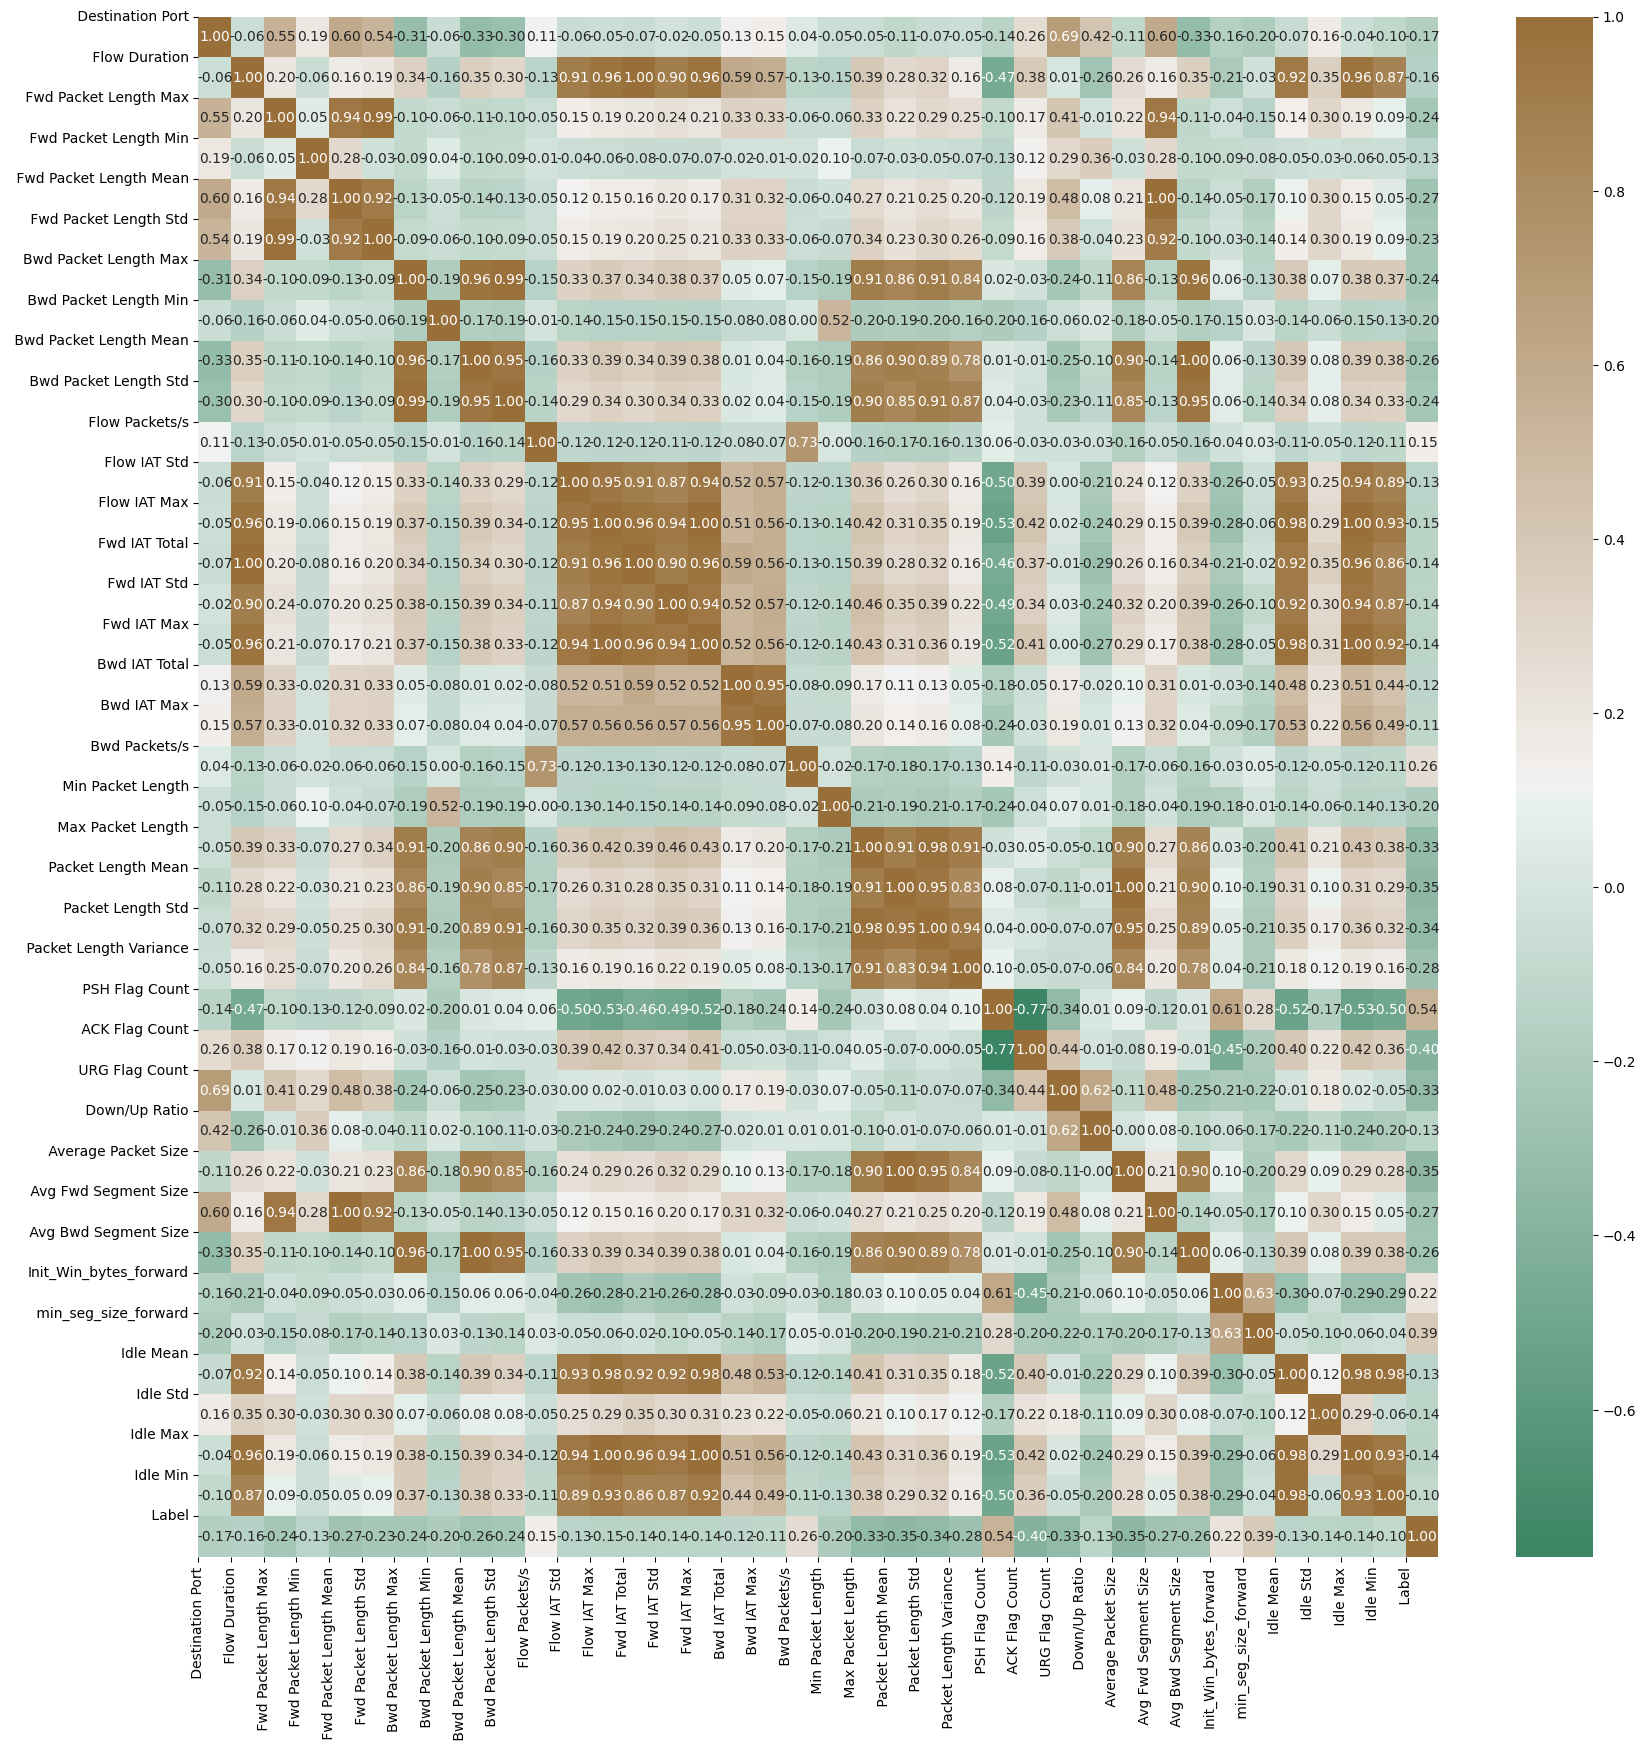

In [27]:
correlation_threshold = 0.1

corr = df_encoded.corr()


columns_to_include = corr.columns[abs(corr[' Label']) >= correlation_threshold]
filtered_corr = corr.loc[columns_to_include, columns_to_include]

fig, ax = plt.subplots(figsize=(20, 20))
colormap = sns.diverging_palette(150, 50, as_cmap=True)
sns.heatmap(filtered_corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(filtered_corr.columns)), filtered_corr.columns)
plt.yticks(range(len(filtered_corr.columns)), filtered_corr.columns)
plt.show()

In [28]:
X = df_encoded.drop(' Label', axis=1)
y = df_encoded[' Label']

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

X_numeric = X.select_dtypes(include=['number'])
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df.head(20)['Feature'].tolist()

df_top_features = df_encoded[top_features + [' Label']]

df_top_features.head()




,Fwd Packet Length Mean,Fwd Packet Length Max,Flow IAT Max,Total Length of Fwd Packets,Bwd Packet Length Mean,Flow Packets/s,Flow Duration,Fwd Packet Length Std,Subflow Bwd Bytes,Bwd Packets/s,...,Avg Fwd Segment Size,Init_Win_bytes_backward,Total Length of Bwd Packets,Packet Length Mean,Destination Port,Average Packet Size,Bwd Packet Length Std,Bwd Header Length,Init_Win_bytes_forward,Label
0,2.0,2,54,2,6.0,37037.037040,54,0.000000,6,18518.518520,...,2.0,0,6,3.333333,10243,5.000000,0.000000,20,1024,10
1,0.0,0,2003984,0,0.0,0.998743,3003776,0.000000,0,0.000000,...,0.0,-1,0,0.000000,80,0.000000,0.000000,0,29200,6
2,7.0,20,68000000,56,2321.4,0.161717,80387278,5.656854,11607,0.062199,...,7.0,229,11607,833.500000,80,897.615385,3802.315321,112,256,2
3,2.0,2,43,2,6.0,46511.627910,43,0.000000,6,23255.813950,...,2.0,0,6,3.333333,3945,5.000000,0.000000,20,1024,10
4,3.0,6,4581562,12,0.0,1.070952,5602494,3.464102,0,0.356984,...,3.0,29200,0,1.714286,80,2.000000,0.000000,64,8192,0


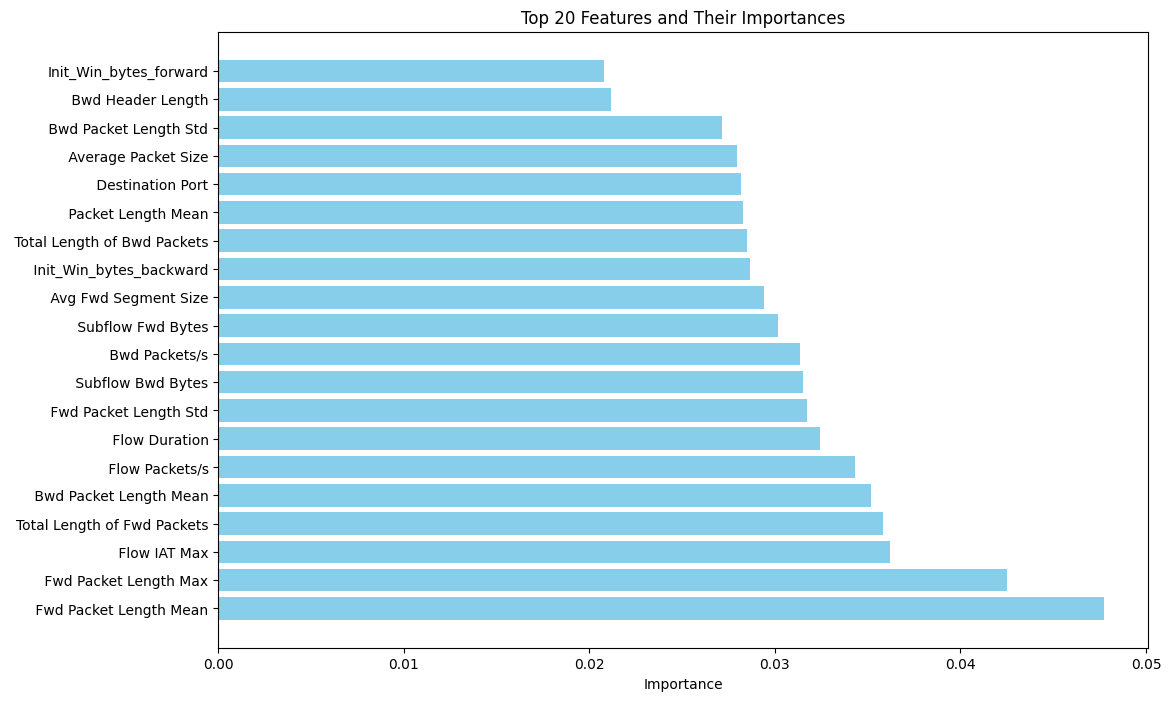

In [30]:
plt.figure(figsize=(12, 8))
plt.barh(top_features, feature_importance_df.head(20)['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Features and Their Importances')
plt.show()

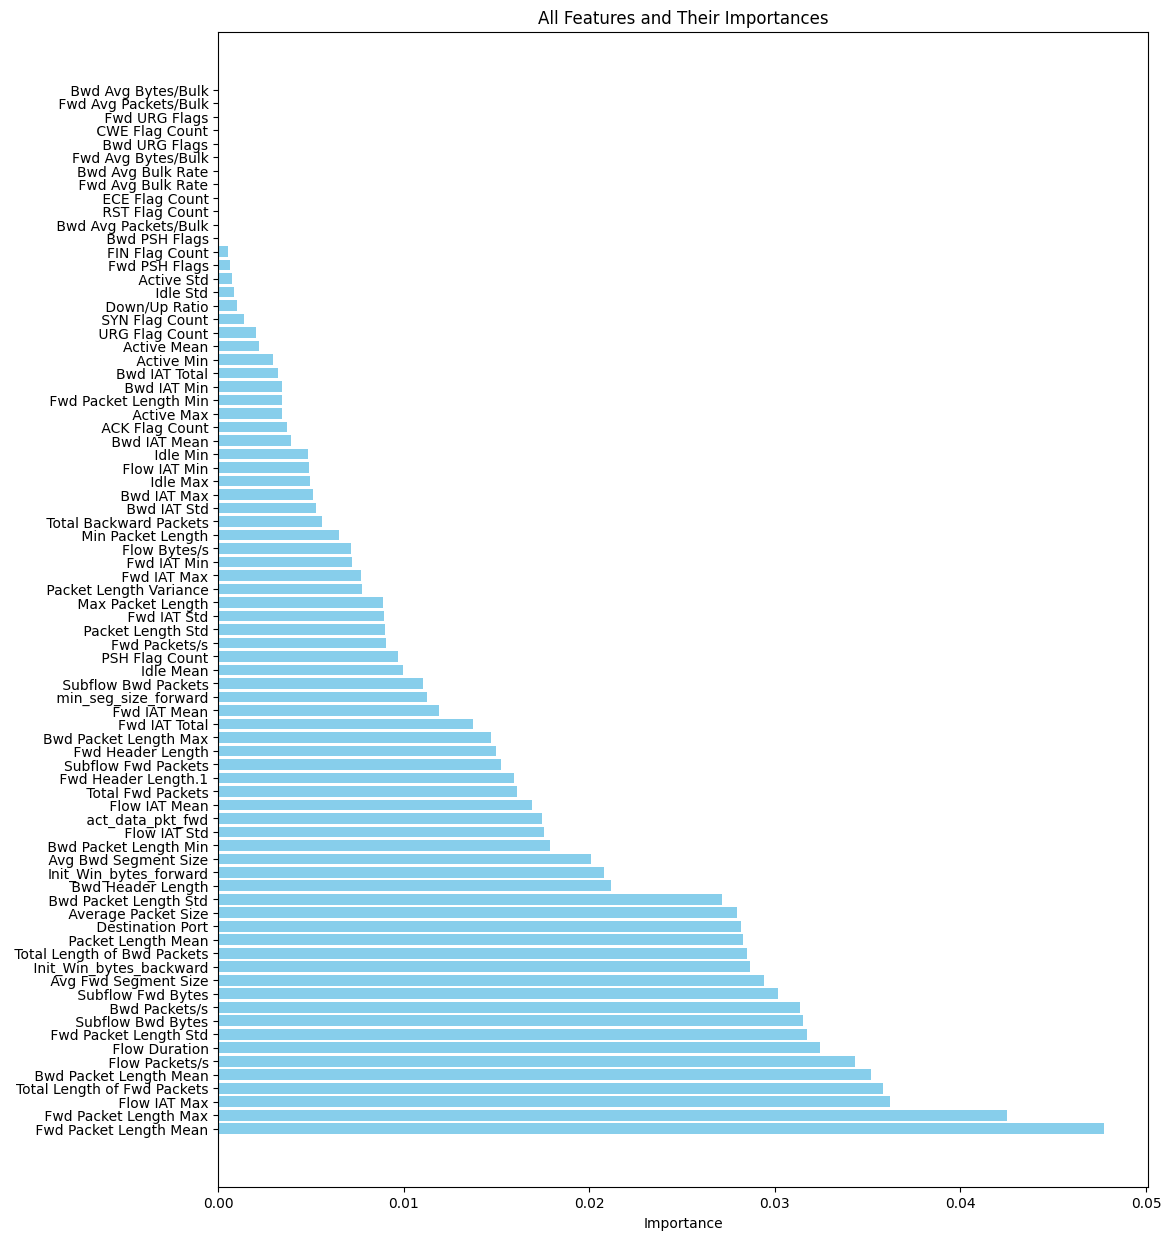

In [35]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot of all features and their importances
plt.figure(figsize=(12, 15))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('All Features and Their Importances')
plt.show()

In [36]:
df_top_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234187 entries, 0 to 234186
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Fwd Packet Length Mean       234187 non-null  float64
 1    Fwd Packet Length Max        234187 non-null  int64  
 2    Flow IAT Max                 234187 non-null  int64  
 3   Total Length of Fwd Packets   234187 non-null  int64  
 4    Bwd Packet Length Mean       234187 non-null  float64
 5    Flow Packets/s               234187 non-null  float64
 6    Flow Duration                234187 non-null  int64  
 7    Fwd Packet Length Std        234187 non-null  float64
 8    Subflow Bwd Bytes            234187 non-null  int64  
 9    Bwd Packets/s                234187 non-null  float64
 10   Subflow Fwd Bytes            234187 non-null  int64  
 11   Avg Fwd Segment Size         234187 non-null  float64
 12   Init_Win_bytes_backward      234187 non-nul

In [38]:
# Assuming 'Label' is the target variable
X_top_features = df_top_features.drop(' Label', axis=1)
y_top_features = df_top_features[' Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y_top_features, test_size=0.2, random_state=42)

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187349 entries, 63072 to 121958
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Fwd Packet Length Mean       187349 non-null  float64
 1    Fwd Packet Length Max        187349 non-null  int64  
 2    Flow IAT Max                 187349 non-null  int64  
 3   Total Length of Fwd Packets   187349 non-null  int64  
 4    Bwd Packet Length Mean       187349 non-null  float64
 5    Flow Packets/s               187349 non-null  float64
 6    Flow Duration                187349 non-null  int64  
 7    Fwd Packet Length Std        187349 non-null  float64
 8    Subflow Bwd Bytes            187349 non-null  int64  
 9    Bwd Packets/s                187349 non-null  float64
 10   Subflow Fwd Bytes            187349 non-null  int64  
 11   Avg Fwd Segment Size         187349 non-null  float64
 12   Init_Win_bytes_backward      187349 non-null

In [40]:
X_top_features.to_csv('X_top_features.csv', index=False)
y_top_features.to_csv('y_top_features.csv', index=False)

In [41]:
print("Infinity values in X_train:", np.any(np.isinf(X_train)))
print("NaN values in X_train:", np.any(np.isnan(X_train)))

Infinity values in X_train: False
NaN values in X_train: False


In [ ]:
from sklearn import metrics

In [44]:
def print_all_accuracy_metric(algorithm, name):
    # computing the accuracy, f1_score, Recall, precision of the model performance
    # predicting the target value from the model for the samples
    y_train_log = algorithm.predict(X_train)
    y_test_log = algorithm.predict(X_test)

    acc_train_log = metrics.accuracy_score(y_train, y_train_log)
    acc_test_log = metrics.accuracy_score(y_test, y_test_log)
    print(name, ": Accuracy on training Data: {:.3f}".format(acc_train_log))
    print(name, ": Accuracy on test Data: {:.3f}".format(acc_test_log))
    print()

    f1_score_train_log = metrics.f1_score(y_train, y_train_log, average='macro')
    f1_score_test_log = metrics.f1_score(y_test, y_test_log, average='macro')
    print(name, ": f1_score on training Data: {:.3f}".format(f1_score_train_log))
    print(name, ": f1_score on test Data: {:.3f}".format(f1_score_test_log))
    print()

    recall_score_train_log = metrics.recall_score(y_train, y_train_log, average='macro')
    recall_score_test_log = metrics.recall_score(y_test, y_test_log, average='macro')
    print(name, ": Recall on training Data: {:.3f}".format(recall_score_train_log))
    print(name, ": Recall on test Data: {:.3f}".format(recall_score_test_log))
    print()

    precision_score_train_log = metrics.precision_score(y_train, y_train_log, average='macro')
    precision_score_test_log = metrics.precision_score(y_test, y_test_log, average='macro')
    print(name, ": precision on training Data: {:.3f}".format(precision_score_train_log))
    print(name, ": precision on test Data: {:.3f}".format(precision_score_test_log))
    print()

    print('\n\nClassification Report\n\n')
    print(metrics.classification_report(y_test, y_test_log))
    print('\n\n')

## Machine Learning

### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clfd.fit(X_train, y_train)
print_all_accuracy_metric(clfd, 'DecisionTreeClassifier')

# Save the model using joblib
joblib.dump(clfd, 'DecisionTreeClassifier.joblib')

DecisionTreeClassifier : Accuracy on training Data: 0.902
DecisionTreeClassifier : Accuracy on test Data: 0.904

DecisionTreeClassifier : f1_score on training Data: 0.491
DecisionTreeClassifier : f1_score on test Data: 0.497

DecisionTreeClassifier : Recall on training Data: 0.499
DecisionTreeClassifier : Recall on test Data: 0.502

DecisionTreeClassifier : precision on training Data: 0.518
DecisionTreeClassifier : precision on test Data: 0.525



Classification Report


              precision    recall  f1-score   support

           0       0.97      0.91      0.94      9999
           1       0.77      0.28      0.42       386
           2       0.94      1.00      0.97     10030
           3       0.98      0.52      0.68      2069
           4       0.95      0.96      0.96      9896
           5       0.32      0.53      0.40      1079
           6       0.22      0.38      0.28      1067
           7       0.83      1.00      0.90      1246
           8       0.00      0.00    

['DecisionTreeClassifier.joblib']

### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
print_all_accuracy_metric(rf_clf, 'RandomForestClassifier')

# Save the model using joblib
joblib.dump(rf_clf, 'RandomForestClassifier.joblib')

RandomForestClassifier : Accuracy on training Data: 1.000
RandomForestClassifier : Accuracy on test Data: 0.995

RandomForestClassifier : f1_score on training Data: 1.000
RandomForestClassifier : f1_score on test Data: 0.906

RandomForestClassifier : Recall on training Data: 1.000
RandomForestClassifier : Recall on test Data: 0.899

RandomForestClassifier : precision on training Data: 1.000
RandomForestClassifier : precision on test Data: 0.919



Classification Report


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9999
           1       0.92      0.95      0.93       386
           2       1.00      1.00      1.00     10030
           3       1.00      1.00      1.00      2069
           4       1.00      1.00      1.00      9896
           5       1.00      0.99      0.99      1079
           6       0.99      0.99      0.99      1067
           7       1.00      1.00      1.00      1246
           8       1.00      1.00    

['RandomForestClassifier.joblib']

### KNN Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3) 
knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

print_all_accuracy_metric(knn_clf, 'KNeighborsClassifier')

joblib.dump(rf_clf, 'KNeighborsClassifier.joblib')

KNeighborsClassifier : Accuracy on training Data: 0.986
KNeighborsClassifier : Accuracy on test Data: 0.973

KNeighborsClassifier : f1_score on training Data: 0.864
KNeighborsClassifier : f1_score on test Data: 0.825

KNeighborsClassifier : Recall on training Data: 0.840
KNeighborsClassifier : Recall on test Data: 0.811

KNeighborsClassifier : precision on training Data: 0.946
KNeighborsClassifier : precision on test Data: 0.850



Classification Report


              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9999
           1       0.85      0.85      0.85       386
           2       0.98      0.98      0.98     10030
           3       0.95      0.95      0.95      2069
           4       0.99      0.99      0.99      9896
           5       0.98      0.96      0.97      1079
           6       0.94      0.95      0.95      1067
           7       0.99      0.98      0.99      1246
           8       1.00      1.00      1.00         1

['KNeighborsClassifier.joblib']

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

print_all_accuracy_metric(logreg_model, 'LogisticRegression')
joblib.dump(nb, 'LogisticRegression.joblib')

LogisticRegression : Accuracy on training Data: 0.448
LogisticRegression : Accuracy on test Data: 0.447

LogisticRegression : f1_score on training Data: 0.120
LogisticRegression : f1_score on test Data: 0.120

LogisticRegression : Recall on training Data: 0.140
LogisticRegression : Recall on test Data: 0.140

LogisticRegression : precision on training Data: 0.117
LogisticRegression : precision on test Data: 0.117



Classification Report


              precision    recall  f1-score   support

           0       0.27      0.21      0.24      9999
           1       0.00      0.00      0.00       386
           2       0.41      0.18      0.25     10030
           3       0.00      0.00      0.00      2069
           4       0.34      0.72      0.46      9896
           5       0.00      0.00      0.00      1079
           6       0.00      0.00      0.00      1067
           7       0.00      0.00      0.00      1246
           8       0.00      0.00      0.00         1
           9   

['LogisticRegression.joblib']

### CatBoost Classifier

In [52]:
import catboost
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(iterations=10, learning_rate=0.1, depth=6)
catboost_model.fit(X_train, y_train)

print_all_accuracy_metric(catboost_model, 'CatBoostClassifier')
joblib.dump(nb, 'CatBoostClassifier.joblib')

0:	learn: 1.6351125	total: 257ms	remaining: 2.32s
1:	learn: 1.3108295	total: 375ms	remaining: 1.5s
2:	learn: 1.1014825	total: 498ms	remaining: 1.16s
3:	learn: 0.9525092	total: 621ms	remaining: 932ms
4:	learn: 0.8330636	total: 749ms	remaining: 749ms
5:	learn: 0.7374409	total: 876ms	remaining: 584ms
6:	learn: 0.6585223	total: 1.01s	remaining: 431ms
7:	learn: 0.5943320	total: 1.13s	remaining: 282ms
8:	learn: 0.5383928	total: 1.26s	remaining: 140ms
9:	learn: 0.4891119	total: 1.38s	remaining: 0us
CatBoostClassifier : Accuracy on training Data: 0.958
CatBoostClassifier : Accuracy on test Data: 0.958

CatBoostClassifier : f1_score on training Data: 0.611
CatBoostClassifier : f1_score on test Data: 0.610

CatBoostClassifier : Recall on training Data: 0.616
CatBoostClassifier : Recall on test Data: 0.614

CatBoostClassifier : precision on training Data: 0.620
CatBoostClassifier : precision on test Data: 0.610



Classification Report


              precision    recall  f1-score   support

    

['CatBoostClassifier.joblib']

### Hybrid Model

- Base Model: Randome Forest Classifier
    - Stacked models: KNN, Decision Tree, Logistic Regression, CatBoost

In [53]:
from sklearn.ensemble import StackingClassifier

meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the base models
logreg_model = LogisticRegression()
clfd = DecisionTreeClassifier(criterion="entropy", max_depth=4)
knn_clf = KNeighborsClassifier(n_neighbors=3)
catboost_model = CatBoostClassifier(iterations=10, learning_rate=0.1, depth=6)

# Define the stacking ensemble model
stacked_model = StackingClassifier(
    estimators=[('DecisionTree', clfd), ('LogisticRegression', logreg_model), ('KNN', knn_clf), ('CatBoostClassifier', catboost_model)],
    final_estimator=meta_model,
    cv=5
)

# Train the stacking ensemble model
stacked_model.fit(X_train, y_train)

# Evaluate the performance of the stacking ensemble model
print_all_accuracy_metric(stacked_model, 'Stacking Ensemble')

0:	learn: 1.6351125	total: 114ms	remaining: 1.02s
1:	learn: 1.3108295	total: 234ms	remaining: 938ms
2:	learn: 1.1014825	total: 371ms	remaining: 866ms
3:	learn: 0.9525092	total: 498ms	remaining: 748ms
4:	learn: 0.8330636	total: 622ms	remaining: 622ms
5:	learn: 0.7374409	total: 742ms	remaining: 494ms
6:	learn: 0.6585223	total: 856ms	remaining: 367ms
7:	learn: 0.5943320	total: 974ms	remaining: 243ms
8:	learn: 0.5383928	total: 1.1s	remaining: 123ms
9:	learn: 0.4891119	total: 1.23s	remaining: 0us
0:	learn: 1.6350709	total: 111ms	remaining: 996ms
1:	learn: 1.3175718	total: 223ms	remaining: 891ms
2:	learn: 1.1075367	total: 336ms	remaining: 784ms
3:	learn: 0.9597418	total: 452ms	remaining: 678ms
4:	learn: 0.8412658	total: 562ms	remaining: 562ms
5:	learn: 0.7473961	total: 673ms	remaining: 448ms
6:	learn: 0.6668145	total: 787ms	remaining: 337ms
7:	learn: 0.6000742	total: 902ms	remaining: 226ms
8:	learn: 0.5427267	total: 1.02s	remaining: 113ms
9:	learn: 0.4911347	total: 1.13s	remaining: 0us
0:	le

In [54]:
joblib.dump(stacked_model, 'StackingEnsemble.joblib')

['StackingEnsemble.joblib']

## Testing Phase

In [55]:
# Later, when you want to make predictions
# Load the model from the file
loaded_model = joblib.load('StackingEnsemble.joblib')

In [57]:
# Here with this particular input we get output as 10
# So we'll give this input to our hybrid model and see whether it is predicting correctly or not

print(X_top_features.iloc[0])
print('\n\noutput:', y_top_features.iloc[0])

 Fwd Packet Length Mean             2.000000
 Fwd Packet Length Max              2.000000
 Flow IAT Max                      54.000000
Total Length of Fwd Packets         2.000000
 Bwd Packet Length Mean             6.000000
 Flow Packets/s                 37037.037040
 Flow Duration                     54.000000
 Fwd Packet Length Std              0.000000
 Subflow Bwd Bytes                  6.000000
 Bwd Packets/s                  18518.518520
 Subflow Fwd Bytes                  2.000000
 Avg Fwd Segment Size               2.000000
 Init_Win_bytes_backward            0.000000
 Total Length of Bwd Packets        6.000000
 Packet Length Mean                 3.333333
 Destination Port               10243.000000
 Average Packet Size                5.000000
 Bwd Packet Length Std              0.000000
 Bwd Header Length                 20.000000
Init_Win_bytes_forward           1024.000000
Name: 0, dtype: float64


output: 10


In [59]:
# Making predictions here with the above given data and checking the output is matching or not

first_row_df = X_top_features.head(1)

prediction = loaded_model.predict(first_row_df)

# Print the prediction
print(f"The predicted class is: {prediction[0]}")

The predicted class is: 10


In [60]:
print(X_top_features.iloc[1])
print('\n\noutput:', y_top_features.iloc[1])

 Fwd Packet Length Mean         0.000000e+00
 Fwd Packet Length Max          0.000000e+00
 Flow IAT Max                   2.003984e+06
Total Length of Fwd Packets     0.000000e+00
 Bwd Packet Length Mean         0.000000e+00
 Flow Packets/s                 9.987429e-01
 Flow Duration                  3.003776e+06
 Fwd Packet Length Std          0.000000e+00
 Subflow Bwd Bytes              0.000000e+00
 Bwd Packets/s                  0.000000e+00
 Subflow Fwd Bytes              0.000000e+00
 Avg Fwd Segment Size           0.000000e+00
 Init_Win_bytes_backward       -1.000000e+00
 Total Length of Bwd Packets    0.000000e+00
 Packet Length Mean             0.000000e+00
 Destination Port               8.000000e+01
 Average Packet Size            0.000000e+00
 Bwd Packet Length Std          0.000000e+00
 Bwd Header Length              0.000000e+00
Init_Win_bytes_forward          2.920000e+04
Name: 1, dtype: float64


output: 6


In [61]:
first_row_df = X_top_features.head(2).tail(1)

prediction = loaded_model.predict(first_row_df)

# Print the prediction
print(f"The predicted class is: {prediction[0]}")

The predicted class is: 6


### Dividing the data so we can test easily

In [62]:
first_row_df = X_top_features.head(10)
first_row_df.to_csv("first_X_10_row_df.csv", index=False)
first_row_df = y_top_features.head(10)
first_row_df.to_csv("first_y_10_row_df.csv", index=False)

In [63]:
first_row_df = X_top_features.head(-10)
first_row_df.to_csv("first_X_10_row_df_1.csv", index=False)
first_row_df = y_top_features.head(-10)
first_row_df.to_csv("first_y_10_row_df_1.csv", index=False)

In [64]:
middle_rows_X = X_top_features.loc[15:24]
middle_rows_y = y_top_features.loc[15:24]
middle_rows_X.to_csv("middle_X_10_rows.csv", index=False)
middle_rows_y.to_csv("middle_y_10_rows.csv", index=False)

In [65]:
first_row_df = X_top_features.head(1)
first_row_df.to_csv("first_X_row_df.csv", index=False)
first_row_df = y_top_features.head(1)
first_row_df.to_csv("first_y_row_df.csv", index=False)

In [66]:
last_rows_X = X_top_features.tail(10)
last_rows_y = y_top_features.tail(10)
last_rows_X.to_csv("last_X_10_rows.csv", index=False)
last_rows_y.to_csv("last_y_10_rows.csv", index=False)

### Live Testing

In [73]:
model_filename = 'StackingEnsemble.joblib'
loaded_model = joblib.load(model_filename)


feature_order = [
    " Fwd Packet Length Mean",
    " Fwd Packet Length Max",
    " Flow IAT Max",
    "Total Length of Fwd Packets",
    " Bwd Packet Length Mean", #
    " Flow Packets/s",
    " Flow Duration",
    " Fwd Packet Length Std",
    " Subflow Bwd Bytes", #
    " Bwd Packets/s",
    " Subflow Fwd Bytes",
    " Avg Fwd Segment Size", 
    " Init_Win_bytes_backward", 
    " Total Length of Bwd Packets",
    " Packet Length Mean",
    " Destination Port", #
    " Average Packet Size", 
    " Bwd Packet Length Std", 
    " Bwd Header Length", #
    "Init_Win_bytes_forward"
]


def make_prediction():
    # Prompt the user for input for each feature
    user_input = {}
    for column in feature_order:
        value = input(f"Enter value for {column}: ")
        # Convert the input to the appropriate data type
        user_input[column] = float(value) if 'float' in str(df.dtypes[column]) else int(value)
    
    # Create a DataFrame with the user input
    user_data = pd.DataFrame([user_input])
    
    # Make predictions using the loaded model
    prediction = loaded_model.predict(user_data)
    
    # Print the prediction
    print(f"The predicted class is: {prediction[0]}")

# Call the function to make predictions based on user input
make_prediction()

The predicted class is: 10
